# Let's get started! ⚡

## Module Import

### Basic Module

In [176]:
# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Visualization

In [177]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette('Set2')

### Data Preprocessing

In [178]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Models

In [179]:
# Catboost Training
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy import stats
from catboost import CatBoostClassifier

### Hyperparameter tuning

In [180]:
# Hyperparameter tuning
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK

# Data Reading

In [181]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [182]:
# 헤드 확인
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [183]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [184]:
# 컬럼별 타입과 Null값 확인
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

# Exploratory Data Analysis 📊🤔

## 데이터 정리

In [185]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

In [186]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

### 기본 정보 확인

In [187]:
data.describe()

Pclass          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881138     0.498854     0.385027    33.295479
std       0.837836    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### 결측치 채우기 위한 분석

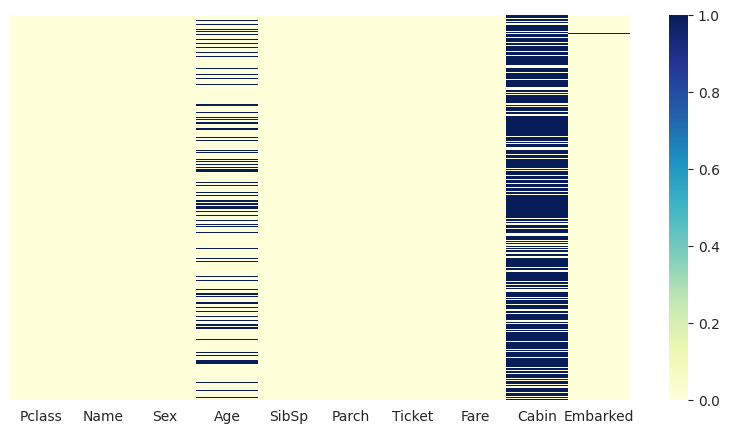

In [189]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
palette=sns.color_palette("pastel")
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [190]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [191]:
data[data.Embarked.isna()]

Pclass                                       Name     Sex   Age  SibSp  \
61        1                        Icard, Miss. Amelie  female  38.0      0   
829       1  Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   

     Parch  Ticket  Fare Embarked  
61       0  113572  80.0      NaN  
829      0  113572  80.0      NaN

In [192]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

S    177
C    141
Q      3
Name: Embarked, dtype: int64

<Axes: xlabel='Sex'>

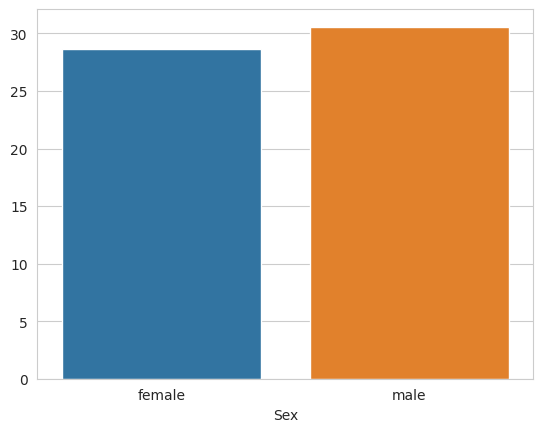

In [193]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [194]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

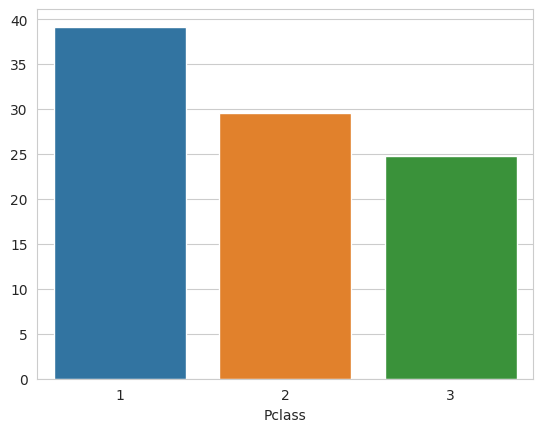

In [195]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [196]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [197]:
data[data.Fare.isna()]

Pclass                Name   Sex   Age  SibSp  Parch Ticket  Fare  \
152       3  Storey, Mr. Thomas  male  60.5      0      0   3701   NaN   

    Embarked  
152        S

<Axes: xlabel='Fare', ylabel='Count'>

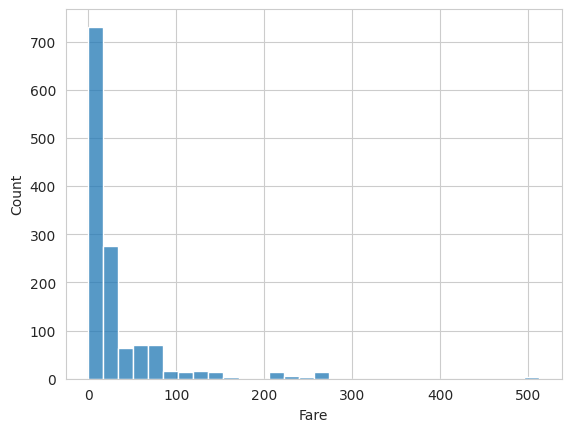

In [198]:
sns.histplot(data.Fare,bins=30)

In [199]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

### 학습데이터만 떼어서 분석

In [200]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

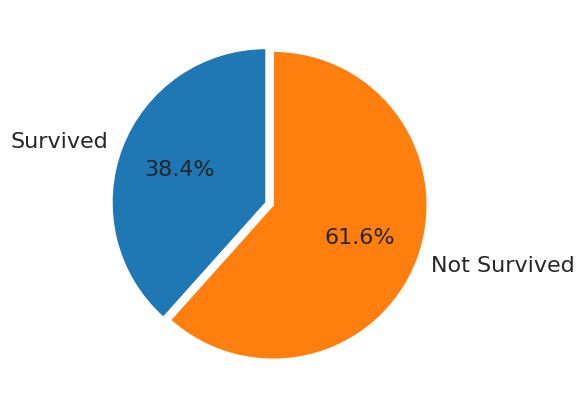

In [201]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [202]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [203]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [204]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

mean  min       max
Survived                          
0         22.117887  0.0  263.0000
1         48.395408  0.0  512.3292

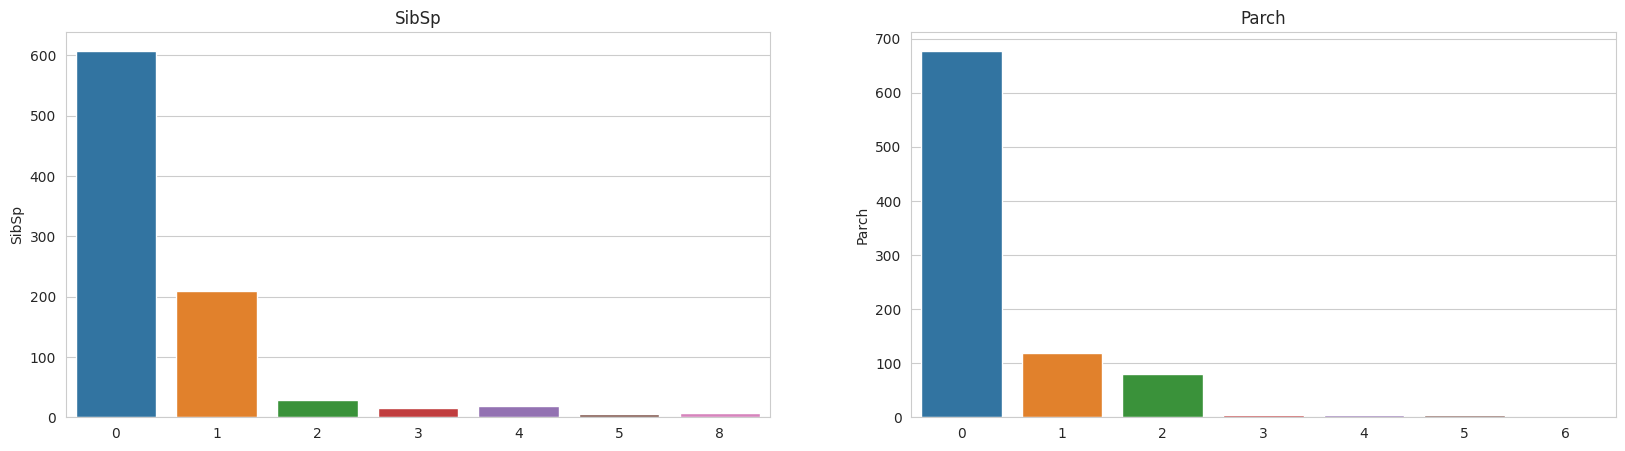

In [205]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0])
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [206]:
data_exp.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: Survived, Length: 730, dtype: int64

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

### 학습데이터와 테스트데이터 합치기

In [207]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    df = pd.concat([df_train, df_test], axis=0, sort=False).reset_index(drop=True)
    df['PassengerId'] = df['PassengerId'].astype(int)
    return df

### 잘못된 승객정보 정정

In [208]:
# 잘못된 승객정보 정정
# thanks to @Nadezda Demidova : https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn
def correct_wrong_passenger_info(df=None):
    df.loc[df['PassengerId'] == 631, 'Age'] = 48

    # Passengers with wrong number of siblings and parch
    df.loc[df['PassengerId'] == 69, ['SibSp', 'Parch']] = [0,0]
    df.loc[df['PassengerId'] == 1106, ['SibSp', 'Parch']] = [0,0]

    return df

### 'Title' 컬럼 생성

In [209]:
# 'Name' 컬럼에서 'Title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'Title' 생성하는 함수
def get_Title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if title in top4_titles:
        return title
    elif title in female_titles_to_Mrs:
        return 'Mrs'
    elif title in female_titles_to_Miss:
        return 'Miss'
    elif title in male_titles_to_Mr:
        return 'Mr'
    else:
        return title

In [210]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['Title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['Title'].isin(title_on_both_side))

    # 치환
    df.loc[cond_mr, 'Title'] = 'Mr'
    df.loc[cond_mrs, 'Title'] = 'Mrs'

    return df

In [211]:
# 'Title'(호칭) 생성
def make_Title(df=None):
    df['Title'] = df['Name'].map(get_Title)

    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_title_on_both_side(df)

    return df

### 단일 피쳐 생성

In [212]:
# 'Surname'(성씨) 생성
def make_Surname(df=None):
    df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
    return df

In [213]:
# 'Family', 'IsAlone' 생성
def make_Family_IsAlone(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1
    # df['IsAlone'] = (df['Family'] <= 1).astype(int)
    return df

### 피쳐 튜닝

In [214]:
# 'Cabin' 컬럼 매핑
def mapping_Cabin(df=None):
    # 결측치를 전부 'U'로 대체
    df['Cabin'] = df['Cabin'].fillna('U')
    # 첫 알파벳(Deck)만 추출
    df['Cabin'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    cabin_category = {'A':9, 'B':8, 'C':7, 'D':6, 'E':5, 'F':4, 'G':3, 'T':2, 'U':1}
    # Mapping
    df['Cabin'] = df['Cabin'].map(cabin_category)
    return df

## 1차 전처리 함수 모음

In [215]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)

    # 잘못된 승객정보 정정
    df = correct_wrong_passenger_info(df)

    # 호칭 만들기
    df = make_Title(df)

    # 'Surname'(성씨) 생성
    df = make_Surname(df)

    # 'Family', 'IsAlone' 생성
    df = make_Family_IsAlone(df)

    # 'Cabin' 컬럼 매핑
    # df = mapping_Cabin(df)

    return df

In [216]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

### 'Age' 결측치 채우기 위한 확인

In [217]:
df.groupby('Title')['Age'].agg({'mean', 'median'})

median       mean
Title                    
Master     4.0   5.482642
Miss      22.0  21.824366
Mr        30.0  32.731405
Mrs       36.0  37.040000

### 'Fare' 결측치 채우기 위한 확인

In [218]:
df.groupby('Pclass')['Fare'].agg({'mean', 'median', 'max'})

median       mean       max
Pclass                              
1       60.0000  87.508992  512.3292
2       15.0458  21.179196   73.5000
3        8.0500  13.302889   69.5500

### 'Embarked' 결측치 채우기 위한 확인

In [219]:
df.loc[df['Embarked'].isnull()][['Name', 'Pclass', 'Sex', 'Title']]

Name  Pclass     Sex Title
61                         Icard, Miss. Amelie       1  female  Miss
829  Stone, Mrs. George Nelson (Martha Evelyn)       1  female   Mrs

In [220]:
df.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           177
        C           141
        Q             3
2       S           242
        C            28
        Q             7
3       S           495
        Q           113
        C           101
Name: Embarked, dtype: int64

## 2차 전처리 함수 선언

### 결측치 채우기

In [221]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
    df['Age'] = df['Age'].astype('int64')
    return df

In [222]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
    return df

In [223]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df=None):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    return df

In [224]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 'Family_Survival' 컬럼 생성
---
* 이 컬럼에 대한 자세한 정보는 https://www.kaggle.com/code/shunjiangxu/blood-is-thicker-than-water-friendship-forever/notebook 를 참고하세요.
---

In [225]:
# 'Family_Survival' 컬럼 생성
def make_Family_Survival(df=None):
    def_survive_val = 0.5
    df['Family_Survival'] = def_survive_val
    survive_df = df[['Survived', 'Name', 'Surname'
                     , 'Fare', 'Ticket', 'PassengerId'
                     , 'SibSp', 'Parch', 'Age', 'Cabin']]

    for grp, grp_df in survive_df.groupby(['Surname', 'Fare']):
        if (len(grp_df) != 1):
            # 가족 그룹(같은 성씨, Fare 2명 이상)을 찾았다.
            for idx, row in grp_df.iterrows():
                max_sur = grp_df.drop(idx)['Survived'].max()
                min_sur = grp_df.drop(idx)['Survived'].min()
                passID = row['PassengerId']
                # 다른 가족의 생존 여부를 이 컬럼에 기록함
                if (max_sur == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (min_sur == 0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

    for _, grp_df in df.groupby('Ticket'):
        if (len(grp_df) != 1):
            # 같은 티켓번호를 가진 다른 사람을 찾았다.
            for idx, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                    max_sur = grp_df.drop(idx)['Survived'].max()
                    min_sur = grp_df.drop(idx)['Survived'].min()
                    passID = row['PassengerId']
                    # 같은 티켓번호를 가진 다른 사람의 생존 여부를 이 컬럼에 기록함
                    if (max_sur == 1.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                    elif (min_sur == 0.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

    return df

### 추가 피쳐 생성 및 매핑

In [226]:
# 카테고리화 피쳐 생성
def make_categorical_columns(df=None):
    # 'Age_Cat' 생성
    df['Age_Cat'] = pd.qcut(df['Age'], 4)
    # 'Fare_Cat' 생성
    df['Fare_Cat'] = pd.qcut(df['Fare'], 4)
    return df

### 레이블 인코딩

In [227]:
# 레이블 인코딩
def label_encoder(df=None):
    encoder = LabelEncoder()
    columns = ['Sex', 'Embarked', 'Title', 'Fare_Cat', 'Age_Cat']
    for column in columns:
        df[column] = encoder.fit_transform(df[column])

    return df

### 컬럼명을 강제로 str로 형변환

In [228]:
# 컬럼명을 강제로 str로 형변환
# 알고리즘에 따라 이 작업이 필요합니다.
def columns_index_to_str_type(df=None):
    df.columns = df.columns.astype(str)
    return df

### 필요없는 컬럼들 드랍

In [229]:
# 필요없는 컬럽들 드랍
def drop_columns(df=None):
    columns = ['Title', 'Fare', 'Age', 'Name'
               , 'PassengerId', 'SibSp', 'Parch'
               , 'Ticket', 'Cabin', 'Embarked', 'Surname']
    df.drop(columns=columns, inplace=True)

    return df

## 2차 전처리 함수 모음

In [230]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)

    # 'Family_Survival' 컬럼 생성
    df = make_Family_Survival(df)

    # 카테고리화 컬럼 생성
    df = make_categorical_columns(df)

    # 레이블 인코딩
    df = label_encoder(df)

    # 컬럼명을 강제로 str로 형변환
    df = columns_index_to_str_type(df)

    # 필요없는 컬럼들 드랍
    df = drop_columns(df)

    return df

In [231]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 전처리 결과 확인

### 결측치 존재여부 확인

In [232]:
df.isnull().sum()

Survived           418
Pclass               0
Sex                  0
Family               0
Family_Survival      0
Age_Cat              0
Fare_Cat             0
dtype: int64

### 피어슨 계수 행렬 시각화

In [233]:
# 피어슨 계수 행렬 시각화
def plot_Pearson_heatmap(df=None):
    corr_matrix = pd.get_dummies(df).corr(method='pearson')

    plt.figure(figsize=(12, 12))
    sns.heatmap(
        corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
    )
    plt.title("Pearson Correlation Heatmap")
    plt.show()
    return

# plot_Pearson_heatmap(df)

### 데이터프레임 확인

In [234]:
df.head(3)

Survived  Pclass  Sex  Family  Family_Survival  Age_Cat  Fare_Cat
0       0.0       3    1       2              0.5        0         0
1       1.0       1    0       2              0.5        3         3
2       1.0       3    0       1              0.5        1         1

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    float64
 1   Pclass           1309 non-null   int64  
 2   Sex              1309 non-null   int64  
 3   Family           1309 non-null   int64  
 4   Family_Survival  1309 non-null   float64
 5   Age_Cat          1309 non-null   int64  
 6   Fare_Cat         1309 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


# CatBoost Training 🏋️‍♂️🌲

## 학습데이터와 테스트데이터 분리

In [236]:
# 학습데이터와 테스트데이터 분리
train_set = df.iloc[:df_train.shape[0],]
test_set = df.iloc[df_train.shape[0]:,]

# 학습데이터의 데이터와 답 분리
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']

# 테스트데이터 생성
X_test = test_set.drop(['Survived'], axis=1)

## Hyperparameter Tuning

In [237]:
# Catboost 모델의 학습 피쳐 리스트 입력
cat_features = [
      'Pclass'
    , 'Sex'
    , 'Family'
    , 'Age_Cat'
    , 'Fare_Cat'
]

In [238]:
# RandomizedSearchCV 파라미터 세팅:

# Number of parameter settings that are sampled
# 'n_iter' (런타임 vs 답의 퀄리티) 사이에 트레이드오프 발생
# NOTE: 여기서 10을 쓴 건 이 노트북을 실습하는 분들이 빠르게 돌려보라고 넣은 것입니다. 숫자 꼭 바꾸세요!
n_iter = 30  # 추천: 30에서 60 사이

# Number of folds in the cross-validation splitting strategy
cv = 5  # 추천 : 4에서 10 사이

In [239]:
# 하이퍼 파라미터의 grid values 세팅
catboost_hparams = {
      'catboost_clf__n_estimators': [100, 200, 300]
    , 'catboost_clf__depth': [4, 8, 12]
    , 'catboost_clf__learning_rate': stats.uniform(loc=0.01, scale=0.99)
    , 'catboost_clf__l2_leaf_reg': stats.uniform(loc=1, scale=9)
}

In [242]:
# basic CatBoost Classifier 클래스 생성
catboost_clf = CatBoostClassifier(
      cat_features=cat_features
      verbose=0
)

In [243]:
# Define the Randomized Search with Cross-Validation
catboost_cv = RandomizedSearchCV(
      estimator=catboost_clf
    , param_distributions=catboost_hparams
    , n_iter=n_iter
    , scoring='accuracy'
    , n_jobs=-1
    , cv=cv
    , verbose=0
)

In [244]:
# Run the Randomized Search with Cross-Validation
catboost_cv.fit(X=X_train, y=y_train)

ValueError: ignored

In [ ]:
# Best Model 저장
catboost_best_cv = {
      'best_model': catboost_cv.best_estimator_
    , 'best_params': catboost_cv.best_params_
    , 'best_score': catboost_cv.best_score_
}

# Print the results:
print('CatBoost best params:', catboost_best_cv['best_params'])
print()
print('CatBoost best cv accuracy:', catboost_best_cv['best_score'])

## Plot Feature Importance

In [ ]:
# Feature Importance 시각화
def plot_feature_importande(catboost_best_cv=None):
    feature_importance = catboost_best_cv['best_model'].get_feature_importance(
        type='FeatureImportance'
        , prettified=True
    )

    feature_importance.plot.bar(x='Feature Id', y='Importances')
    plt.title('CatBoost Feature Importance')
    plt.show()
    return

# plot_feature_importande(catboost_best_cv)

## Fit & Prediction

In [ ]:
# 위에서 찾은 최적의 hyperparameters set을 이용한 최고의 모델 생성
params = catboost_best_cv['best_params']

final_catboost_clf = CatBoostClassifier(
      n_estimators=int(params['n_estimators'])
    , depth=int(params['depth'])
    , learning_rate=round(params['learning_rate'],5)
    , l2_leaf_reg=round(params['l2_leaf_reg'],5)
    # , cat_features=cat_features
    , random_state=42
    , verbose=0
)

# 생성된 최종 모델에 학습데이터를 넣어서 학습
final_catboost_clf.fit(X_train, y_train)

In [ ]:
# 테스트데이터 넣어서 예측
pred = final_catboost_clf.predict(X_test)

# Submission File 🏆🎯

## 제출파일 생성

In [ ]:
def make_submission_file(df_test=None, pred=None):
    # 제출파일 준비: PassengerId - Survived
    submission = pd.DataFrame({
        'PassengerId' : df_test['PassengerId'],
        'Survived' : pred
    })

    submission['Survived'] = submission['Survived'].astype(int)

    # 제출파일 저장
    submission.to_csv('submission.csv', index=False)
    print('your submission file is saved!')
    return

make_submission_file(df_test, pred)

## 채점하기

In [ ]:
def grade_submission(filename=None):
    # 생성된 데이터 파일과 솔루션 불러오기
    # 파일 경로 적절히 수정해서 쓰세요.
    filename = './' + filename
    submission = pd.read_csv(filename)
    solution = pd.read_csv('./solution.csv')

    # 채점 테이블 생성
    marking = submission.merge(solution, on='PassengerId')
    marking.columns = ['PassengerId', 'Submission', 'Solution']

    # 'Check' : 맞으면 1, 틀리면 0
    marking['Check'] = 0

    # 채점
    cond = marking['Submission'] == marking['Solution']
    marking.loc[cond, 'Check'] = 1

    # 정답 계산 및 출력
    result = marking['Check'].sum() / marking.shape[0]
    print('정답: {0:.5f}'.format(result))

    return

grade_submission('submission.csv')